# Визуализация с seaborn

## Домашнее задание 

### Цель домашнего задания

Отработать навык визуализации и форматирования данных с помощью seaborn. Научиться использовать механизмы стилизации для фокусировки внимания читателей графиков.

### Описание домашнего задания и формат сдачи

Выполните предложенные задачи по визуализации данных — впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

У всех графиков обязательно должен присутствовать заголовок и подписи осей, добавленные через объект класса Axes (кроме pairplot и FacetGrid, в этих графиках допустимо использовать стандартные подписи, генерируемые seaborn). Убедитесь, что все метки и подписи осей читаемы и не накладываются друг на друга и на графики. При построении нескольких графиков в одних координатных осях должна быть легенда.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` — порядковый номер записи в датасете.
* `Name` — наименование игры.
* `Platform` — платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и другие).
* `Year` — год выпуска игры.
* `Genre` — жанр игры.
* `Publisher` — наименование компании-издателя игры.
* `NA_Sales` — объём продаж игры в Северной Америке, млн копий.
* `EU_Sales` — объём продаж игры в Европе, млн копий.
* `JP_Sales` — объём продаж игры в Японии, млн копий.
* `Other_Sales` — объём продаж игры в остальных странах, млн копий.
* `Global_Sales` — объём продаж игры по всему миру, млн копий.

### Критерии оценки

**Зачёт** — выполнены задачи 1-7, каждый график отформатирован и читаем.

**На доработку** — выполнены не все обязательные задачи или какой-то из графиков не читаем/не подписан.

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки.
* Если при попытке построить гистограмму вы получаете ошибку `module 'seaborn' has no attribute 'histplot'` — у вас установлена устаревшая версия библиотеки seaborn. Обновить её можно с помощью команды:
** `!pip install seaborn --upgrade` в ячейке ноутбука 
** `pip install seaborn --upgrade` в терминале Jupyter 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

In [3]:
df = pd.read_csv('vgsales.csv')
df.head()
print(df)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

### Задача 1

Постройте линейный график динамики объёма продаж всех игр жанра «Sports» в Японии. Задайте графику размер 12 на 6.

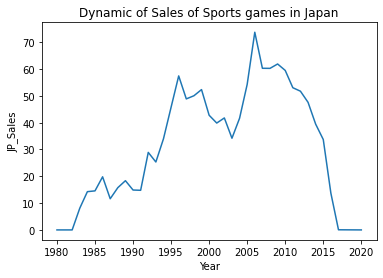

<Figure size 864x432 with 0 Axes>

In [4]:
data = df.pivot_table(index='Year', values='JP_Sales', aggfunc=sum)
data.head()

ax = sns.lineplot(x=data.index, y='JP_Sales', data=data)
ax.set(xlabel='Year',ylabel='JP_Sales')
ax.set_title('Dynamic of Sales of Sports games in Japan')
plt.figure(figsize=(12,6))
plt.show()

### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии «Activision» в Северной Америке, Европе, Японии и во всем мире.

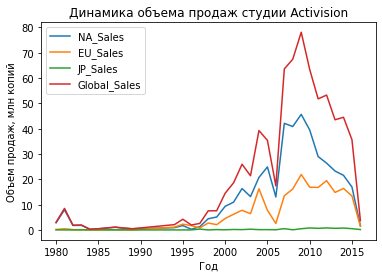

In [6]:
cols = ['NA_Sales','EU_Sales','JP_Sales','Global_Sales']



data = df[df['Publisher'] == 'Activision'].groupby('Year')[cols].sum().reset_index()



fig, ax = plt.subplots()



for col in cols:

    sns.lineplot(x=data['Year'], y=data[col], label=col, ax=ax)



ax.set_title('Динамика объема продаж студии Activision')

ax.set_xlabel('Год')

ax.set_ylabel('Объем продаж, млн копий')

plt.show()

### Комментарий для преподавателя:

В этом задании допустимо вместо прохода циклом использовать `pd.melt()`

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии «Activision» в Северной Америке, Европе, Японии и во всем мире.

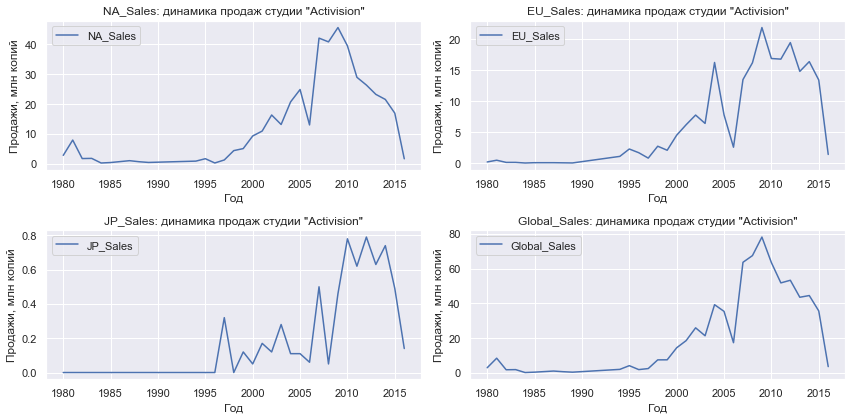

In [90]:

cols = ['NA_Sales','EU_Sales','JP_Sales','Global_Sales']

data = df[df['Publisher'] == 'Activision'].groupby('Year')[cols].sum()

fig, ax = plt.subplots(nrows=2, ncols=2)

for i, col in enumerate(cols):
    
    sns.lineplot(x='Year', y=col, data=data, ax=ax[i // 2][i % 2], label=col)

    ax[i // 2][i % 2].set_title(col + ': динамика продаж студии "Activision"')

    ax[i // 2][i % 2].set_xlabel('Год')

    ax[i // 2][i % 2].set_ylabel('Продажи, млн копий')

fig.tight_layout()

plt.show()

### Задача 4

Постройте PairPlot для всех численных признаков датасета. Разным цветом укажите цвета для разных платформ.

Примечание: при построении этого графика pandas может выдавать предупреждения (warnings), в этой задаче такое поведение допустимо.

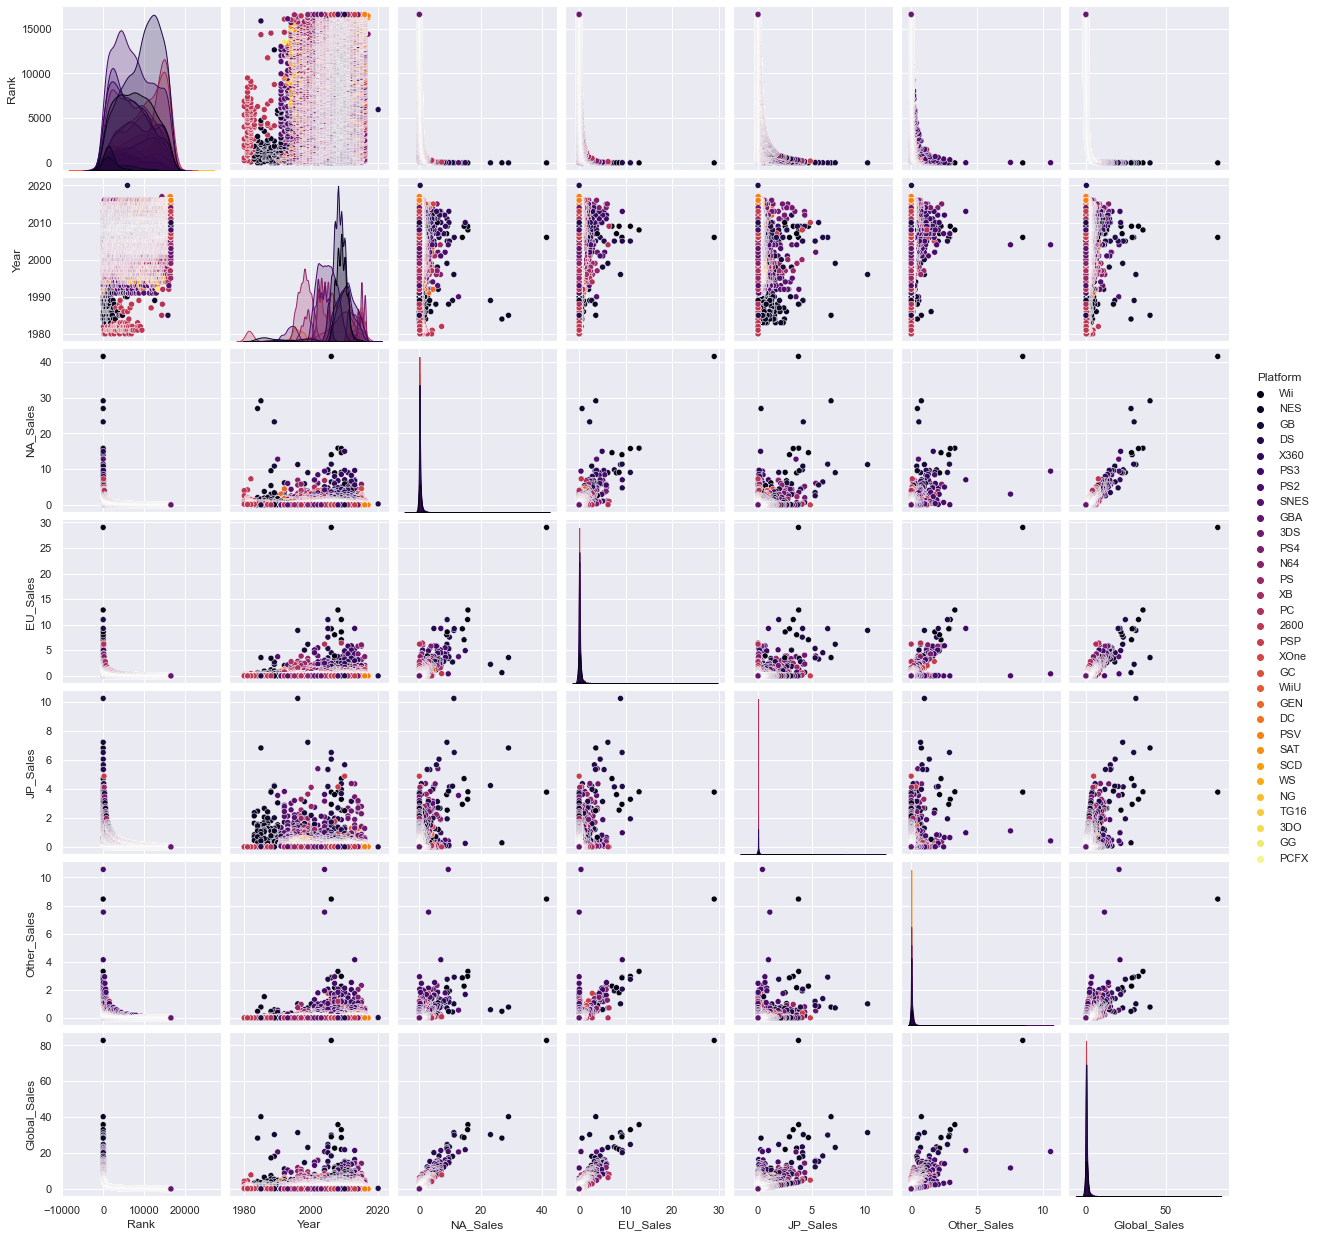

In [27]:
sns.pairplot(df, hue="Platform", palette='inferno')

### Задача 5

В одной координатной сетке постройте 2 гистограммы распредения мировых продаж игр издателей «Microsoft Game Studios» и «Take-Two Interactive» после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


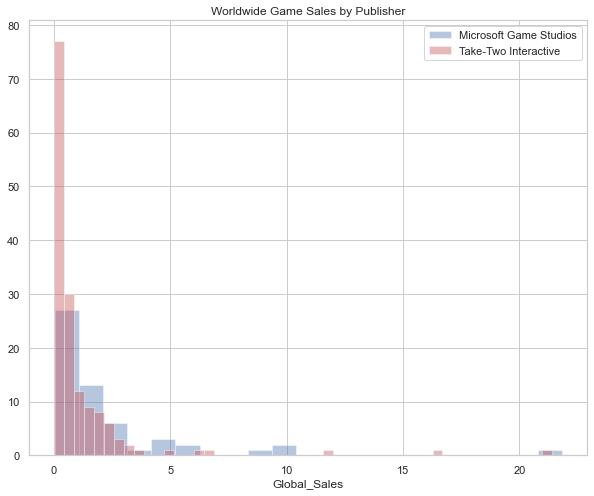

In [29]:
data = df[(df['Publisher'] == 'Microsoft Game Studios') | (df['Publisher'] == 'Take-Two Interactive')]
data = data[data['Year'] >= 2010]

sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))
mics_g_sales = data[data['Publisher'] == 'Microsoft Game Studios']['Global_Sales']
take_two_sales = data[data['Publisher'] == 'Take-Two Interactive']['Global_Sales']

sns.distplot(mics_g_sales, kde=False, color="b", hist_kws={"alpha":0.4}, label="Microsoft Game Studios")
sns.distplot(take_two_sales, kde=False, color="r", hist_kws={"alpha":0.4}, label="Take-Two Interactive")

plt.title("Worldwide Game Sales by Publisher")
plt.legend()
plt.show()

### Задача 6

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зелёного полупрозрачного прямоугольника.

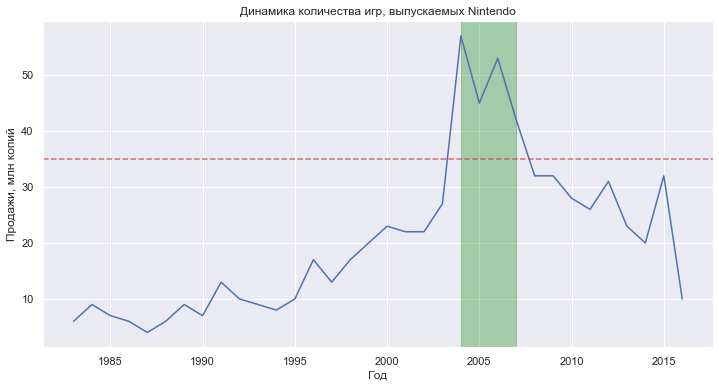

In [92]:
data = df[df['Publisher'] == 'Nintendo'].groupby('Year')['Name'].count()

min_year, max_year = data[data > 35].index.min(), data[data > 35].index.max()

fig, ax = plt.subplots()

sns.lineplot(x=data.index, y=data, ax=ax)

ax.axvspan(xmin=min_year, xmax=max_year, color='green', alpha=0.3)

ax.axhline(y=35, linestyle='--', color='r', alpha=0.8)

ax.set_title('Динамика количества игр, выпускаемых Nintendo')

ax.set_xlabel('Год')

ax.set_ylabel('Продажи, млн копий')

plt.show()

### Задача 7

Определите 3 жанра и 4 платформы с самыми большими продажами игр в мире за всё время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанра, платформы). Разными цветами укажите игры разных годов. Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны.

Делайте графики достаточно читаемыми, чтобы из них можно было сделать вывод о наличии / отсутствии зависимостей в данных.

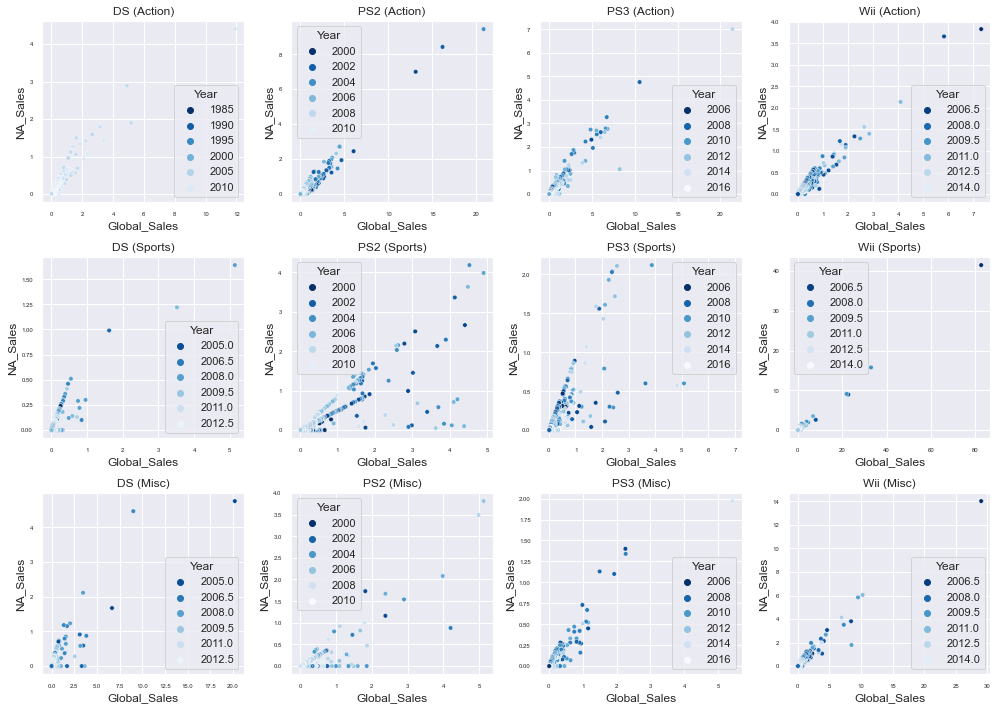

In [57]:
data = pd.read_csv('vgsales.csv')

# Определяем необходимые для задания показатели
genres = data.Genre.value_counts()[:3].index # Первые три Genre
platforms = data.Platform.value_counts()[:4].index # Первые 3 Platform

# Отображение сетки 4 на 3 с графиками в каждой ячейке
fig, axs = plt.subplots(3, 4, figsize=(14, 10))
i, j = 0, 0

for genre in genres: # Цикл по жанрам
    for platform in platforms: # Цикл по платформам
        # Отфильтровываем игры по паре (Genre, Platform)
        sub_data = data[(data['Genre'] == genre) & (data['Platform'] == platform)]
        # Рисуем точечный график для каждой пары
        sns.scatterplot(x="Global_Sales", y="NA_Sales", hue="Year", palette="Blues_r", s=20, data=sub_data, ax=axs[i][j])
        # Добавляем подпись для каждой платформы
        axs[i][j].set_title("{} ({})".format(platform, genre))
        # Уменьшаем размер шрифта для названий осей
        axs[i][j].tick_params(labelsize=6)
        # Меняем индексы для перехода к следующей ячейке
        j += 1 
    else: # Сбрасываем индекс, когда доходим до конца строки
        i += 1
        j = 0
        
plt.tight_layout(pad=1.0) # Добавляем межграфиковые промежутки
plt.show() # Выводим график